In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = os.listdir('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD')

In [5]:
folder_path1='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train/no-wear tools'
folder_path2='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train/wear tools'
folder_path3='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Test/no-wear tools'
folder_path4='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Test/wear tools'

In [6]:
ntw_train_img=glob.glob(os.path.join(folder_path1,'*.jpg'))
tw_train_img=glob.glob(os.path.join(folder_path2,'*.jpg'))
ntw_test_img=glob.glob(os.path.join(folder_path3,'*.jpg'))
tw_test_img=glob.glob(os.path.join(folder_path4,'*.jpg'))

In [7]:
print(len(ntw_train_img))
print(len(tw_train_img))
print(len(ntw_test_img))
print(len(tw_test_img))

2400
4000
600
1000


In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [10]:
image_gen.flow_from_directory('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD')

Found 8000 images belonging to 2 classes.


In [11]:
image_shape=(150,150,3)
image_shape[:2]

(150, 150)

In [19]:
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model as a sequential sequence of layers
vgg16_custom = Sequential()

# Define convolutional layers
vgg16_custom.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
vgg16_custom.add(Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
vgg16_custom.add(MaxPooling2D((2, 2)))

vgg16_custom.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
vgg16_custom.add(MaxPooling2D((2, 2)))

vgg16_custom.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
vgg16_custom.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(MaxPooling2D((2, 2)))

vgg16_custom.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(Conv2D(256, (3, 3), activation='sigmoid', padding='same'))
vgg16_custom.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(MaxPooling2D((2, 2)))

vgg16_custom.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(Conv2D(256, (3, 3), activation='sigmoid', padding='same'))
vgg16_custom.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_custom.add(MaxPooling2D((2, 2)))

# Define classification layers
vgg16_custom.add(Flatten())
vgg16_custom.add(Dense(128,activation='sigmoid'))
vgg16_custom.add(Dropout(0.5))
vgg16_custom.add(Dense(1, activation='sigmoid'))

# Print a summary of the model architecture
vgg16_custom.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                   

In [13]:
vgg16_custom.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
batch_size=16
train_image_gen=image_gen.flow_from_directory('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')
batch_size=13
test_image_gen=image_gen.flow_from_directory('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Test',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [15]:
results=vgg16_custom.fit_generator(train_image_gen,epochs=20,
                            validation_data=test_image_gen)

<ipython-input-15-d0cbdc3ae0b2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results=vgg16_custom.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
400/400 [==============================] - 2113s 5s/step - loss: 0.7509 - accuracy: 0.5659 - val_loss: 0.6642 - val_accuracy: 0.6250
Epoch 2/20
400/400 [==============================] - 201s 502ms/step - loss: 0.6869 - accuracy: 0.5948 - val_loss: 0.6629 - val_accuracy: 0.6250
Epoch 3/20
400/400 [==============================] - 203s 506ms/step - loss: 0.6730 - accuracy: 0.6106 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 4/20
400/400 [==============================] - 220s 549ms/step - loss: 0.6680 - accuracy: 0.6198 - val_loss: 0.6637 - val_accuracy: 0.6250
Epoch 5/20
400/400 [==============================] - 207s 517ms/step - loss: 0.6650 - accuracy: 0.6227 - val_loss: 0.6621 - val_accuracy: 0.6250
Epoch 6/20
400/400 [==============================] - 208s 520ms/step - loss: 0.6662 - accuracy: 0.6237 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 7/20
400/400 [==============================] - 204s 510ms/step - loss: 0.6640 - accuracy: 0.6247 - val_loss: 0.6622 - v

In [16]:
accuracy=results.history['accuracy']
val_accuracy=results.history['val_accuracy']

loss=results.history['loss']
val_loss=results.history['val_loss']

Text(0, 0.5, 'Accuracy')

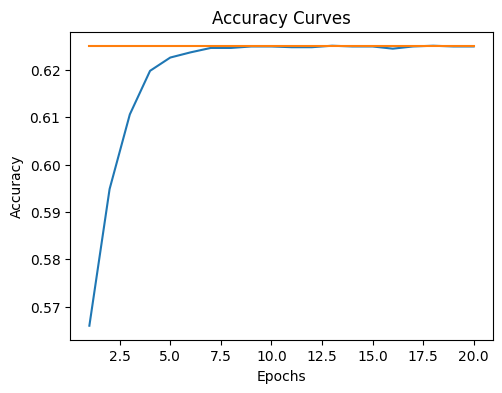

In [17]:
trained_epochs=len(results.history['accuracy'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, trained_epochs+1), accuracy, label='Training accuracy')
plt.plot(range(1, trained_epochs+1), val_accuracy, label='Validation accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

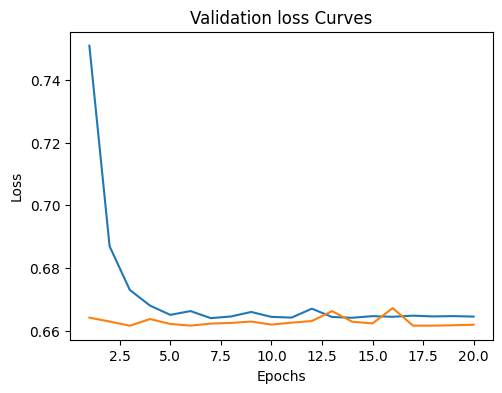

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, trained_epochs+1), loss, label='Training loss')
plt.plot(range(1, trained_epochs+1), val_loss, label='Validation loss')
plt.title('Validation loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')